<a href="https://colab.research.google.com/github/maulss/Machine_learning/blob/main/Kuis1_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Unduh Dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

# Mengambil data dan target dari dataset MNIST
X, y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Label 0: 6903 data points
Label 1: 7877 data points
Label 2: 6990 data points
Label 3: 7141 data points
Label 4: 6824 data points
Label 5: 6313 data points
Label 6: 6876 data points
Label 7: 7293 data points
Label 8: 6825 data points
Label 9: 6958 data points


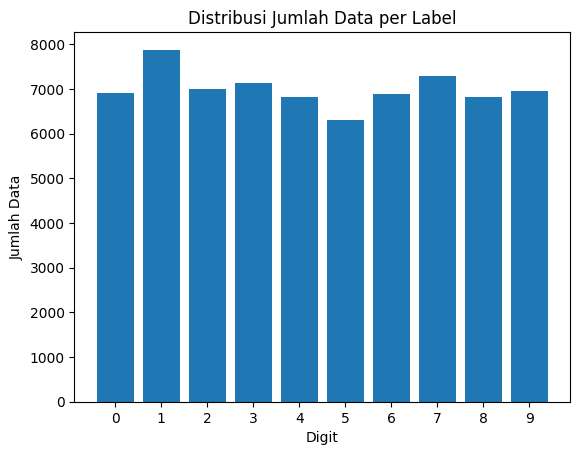

In [3]:
# 1. Cek Data Imbalance
label_counts = np.bincount(y.astype(int))
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data points")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10))
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03

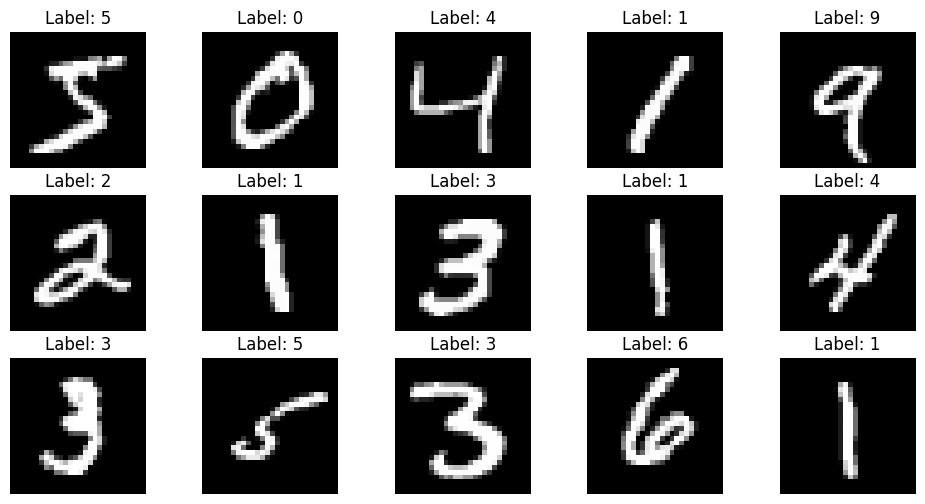

In [4]:
# 2. Menampilkan 15 buah Citra Pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

3. Lakukan proses ekstraksi tur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

In [5]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 3. Ekstraksi Fitur PCA
pca = PCA(n_components=50)  # Ganti jumlah komponen sesuai kebutuhan
X_pca = pca.fit_transform(X_scaled)

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.


# rasio 70:30

In [7]:
# 4. Data Training dan Testing 70:30
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
print("Rasio 70:30")
print("Data Training:", X_train.shape, y_train.shape)
print("Data Testing:", X_test.shape, y_test.shape)
print("")

Rasio 70:30
Data Training: (49000, 50) (49000,)
Data Testing: (21000, 50) (21000,)



5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
Anda diperbolehkan untuk melakukan tunning parameter.
Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

In [8]:
# 5. Klasifikasi dengan Naive Bayes Gaussian

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)


In [9]:
# 5. Klasifikasi dengan SVM

svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
svm_classifier.fit(X_train, y_train)
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

6. Evaluasi model yang Anda buat terhadap data training dan data testing.

In [13]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [14]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.8718163265306123 = 87.18%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4845
           1       0.96      0.94      0.95      5513
           2       0.83      0.85      0.84      4857
           3       0.84      0.83      0.84      4965
           4       0.86      0.86      0.86      4888
           5       0.77      0.84      0.80      4398
           6       0.92      0.92      0.92      4788
           7       0.92      0.86      0.89      5045
           8       0.83      0.84      0.84      4833
           9       0.82      0.83      0.83      4868

    accuracy                           0.87     49000
   macro avg       0.87      0.87      0.87     49000
weighted avg       0.87      0.87      0.87     49000

Naive Bayes (Training) Confusion Matrix:
[[4517    0   49   46    4  134   74    6   10    5]
 [   0 5155   98   24    8   82   30   2

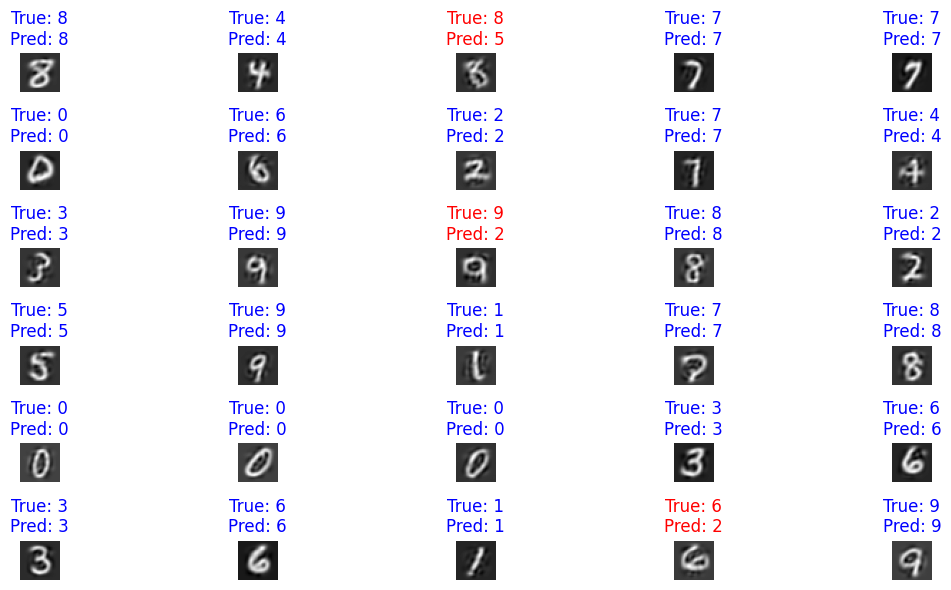

In [15]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'blue'  # Jika prediksi benar, teks berwarna biru
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [16]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.939795918367347 = 93.98%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4845
           1       0.97      0.99      0.98      5513
           2       0.92      0.93      0.93      4857
           3       0.91      0.92      0.91      4965
           4       0.94      0.96      0.95      4888
           5       0.90      0.89      0.90      4398
           6       0.96      0.96      0.96      4788
           7       0.95      0.95      0.95      5045
           8       0.93      0.90      0.92      4833
           9       0.93      0.91      0.92      4868

    accuracy                           0.94     49000
   macro avg       0.94      0.94      0.94     49000
weighted avg       0.94      0.94      0.94     49000

SVM (Training) Confusion Matrix:
[[4765    0   14    8    6   26   12    0   13    1]
 [   1 5434   18   11    3    4    1   10   26    5]
 [  23   24 

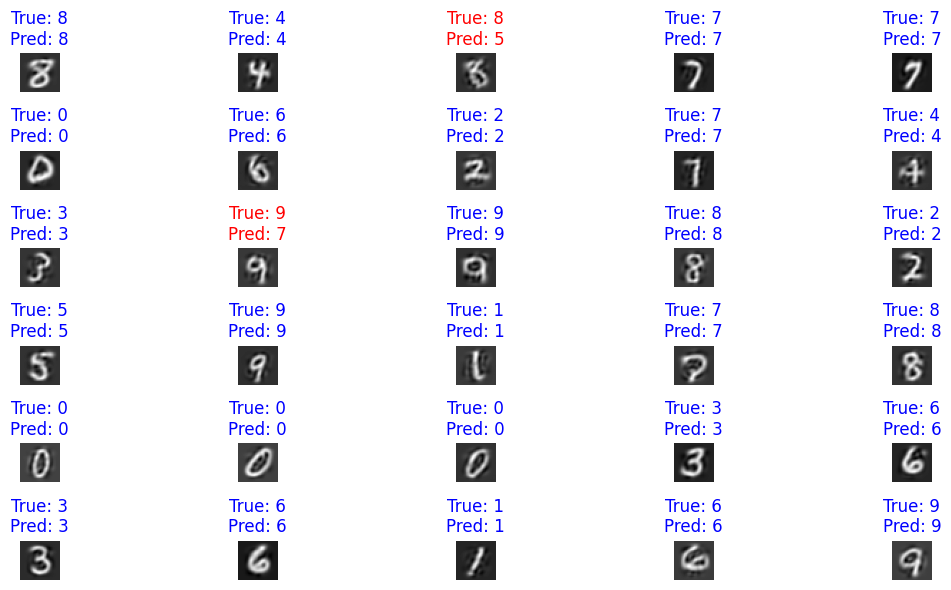

In [17]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'blue'  # Jika prediksi benar, teks berwarna biru
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [18]:
# 4. Pembagian Data Training dan Testing 80:20
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [19]:
# 5. Klasifikasi dengan Naive Bayes Gaussian

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [20]:
# 5. Klasifikasi dengan SVM

svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
svm_classifier.fit(X_train, y_train)
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

In [21]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

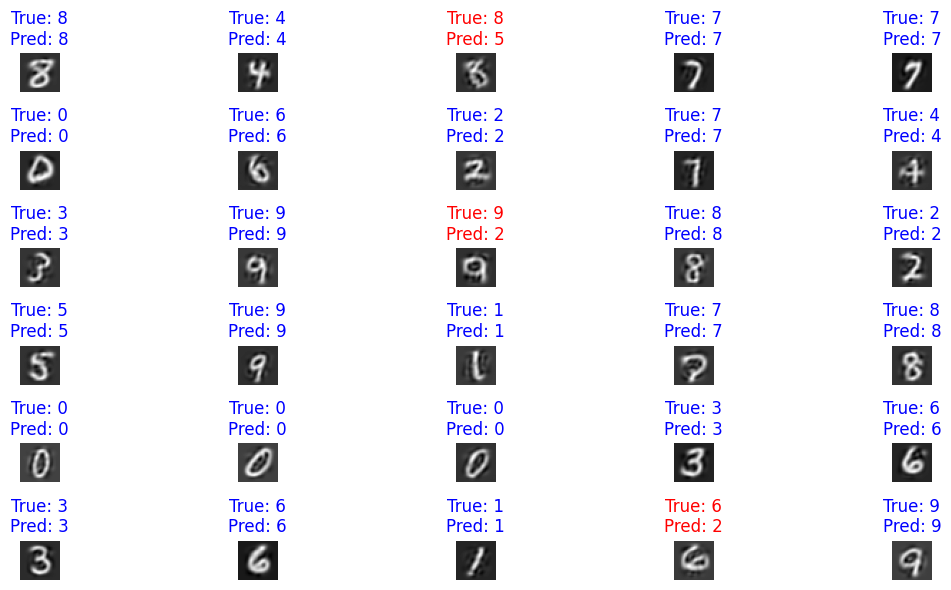

In [22]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'blue'  # Jika prediksi benar, teks berwarna biru
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()